<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/MPD_Geometric_Stability_Analysis_Fig5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GERANDO FIGURA 5 CORRIGIDA

Calculando dados...
  B0 = 0.025 T, G = 3.4, λ_min = -0.600
  B0 = 0.221 T, G = 263.9, λ_min = 9.982
  B0 = 0.417 T, G = 939.5, λ_min = 28.299
  B0 = 0.613 T, G = 2030.2, λ_min = 42.004
  B0 = 0.809 T, G = 3536.0, λ_min = 48.359

Ponto crítico:
  G_crit = 13.24 (esperado: 13.5)
  λ_min(G_crit) = -0.015


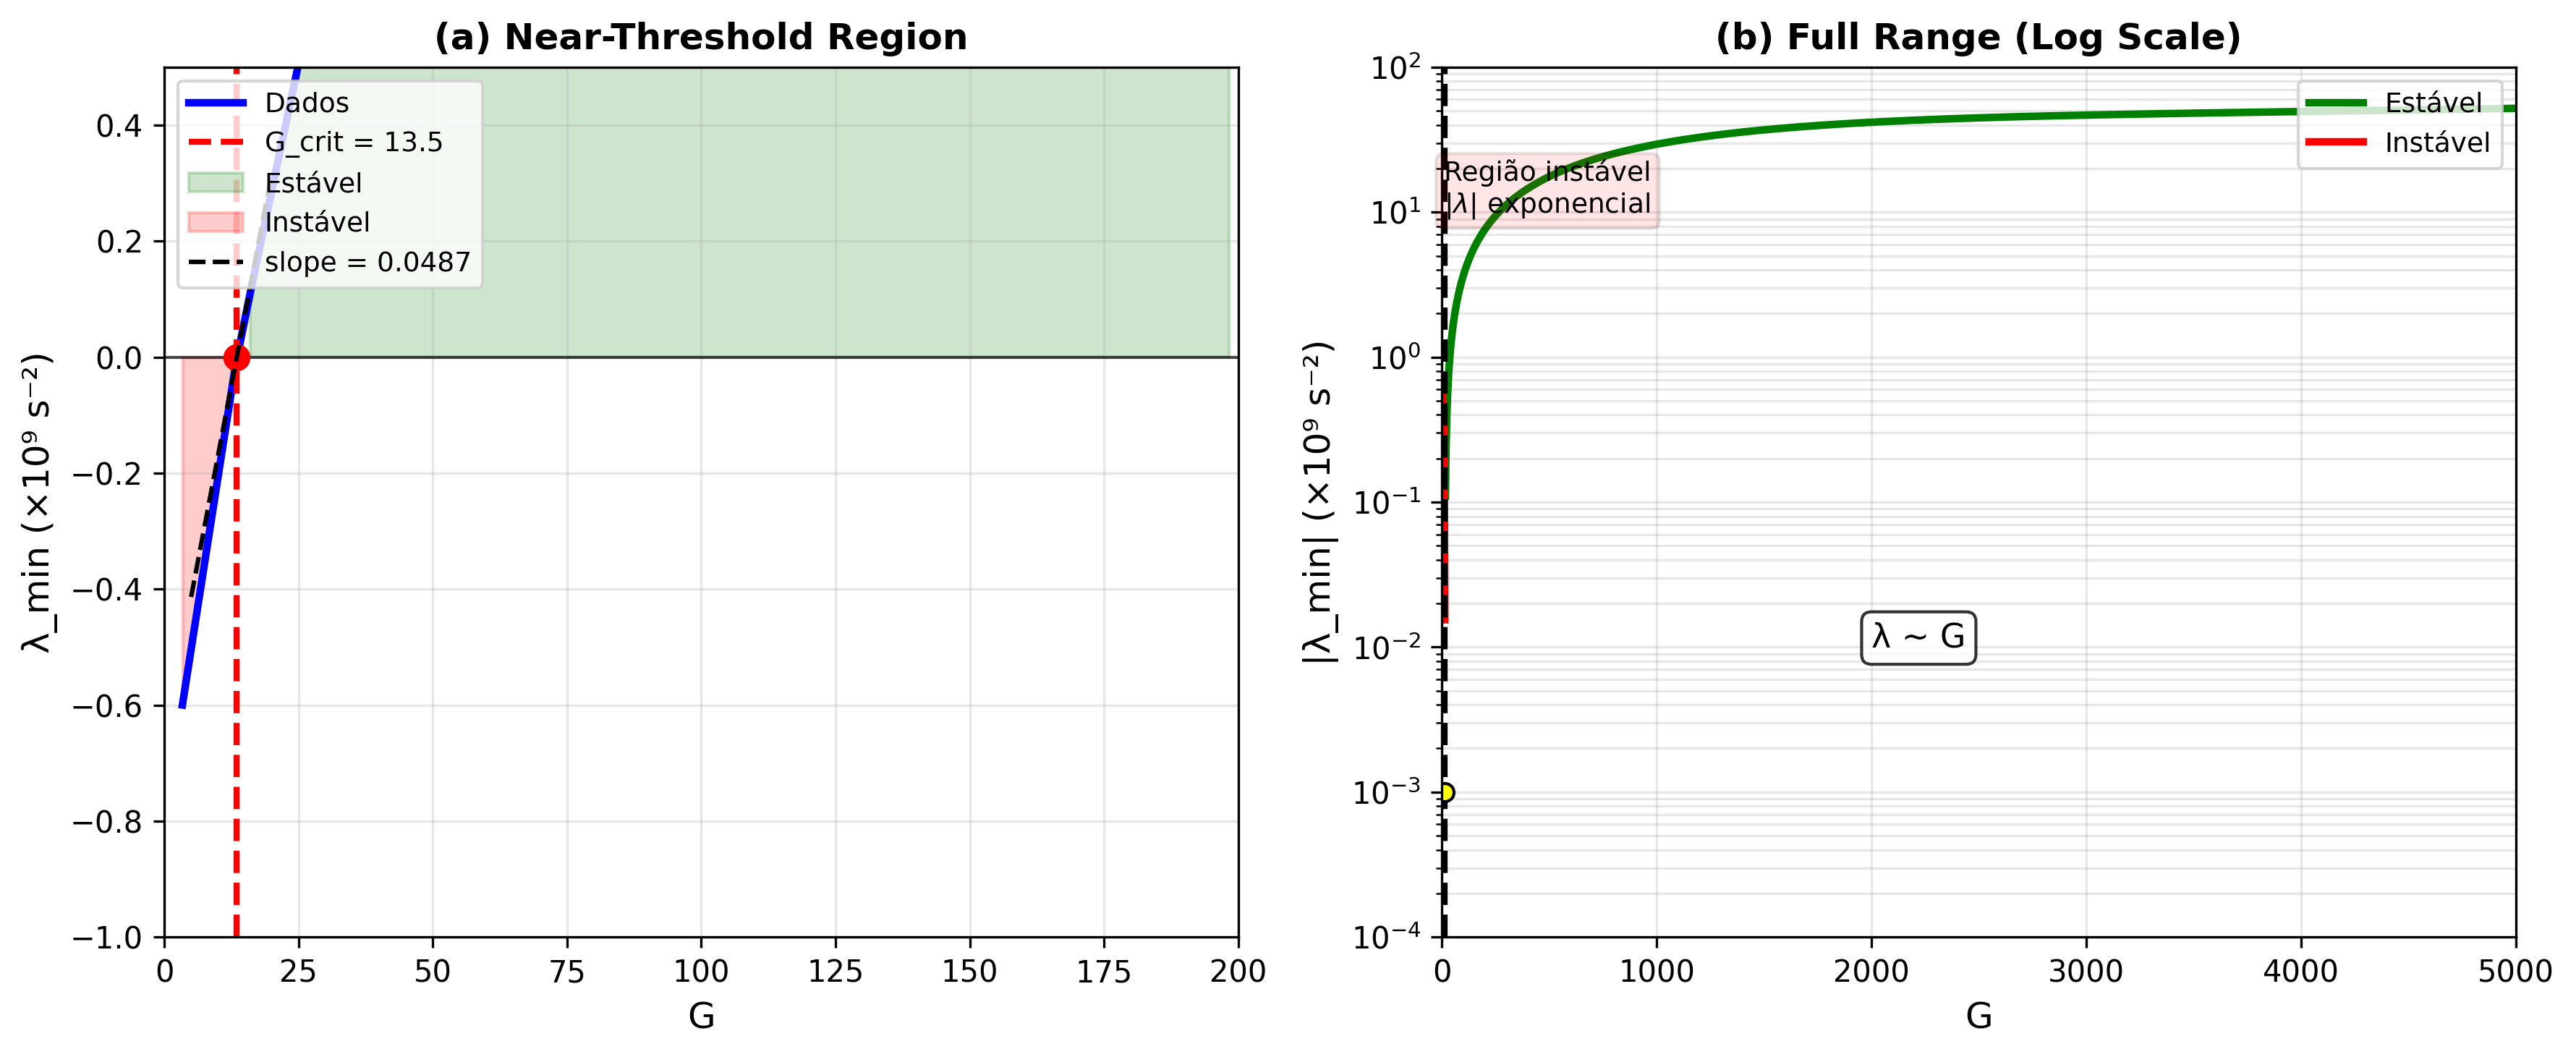


  ✓ Fig5_corrected.png saved

VERIFICAÇÃO DOS VALORES

Configuração de referência (B0 = 0.5 T):
  G = 1352.3
  λ_min = 35.135 ×10⁹ s⁻²

Perto do threshold (G ≈ 13.5):
  G = 13.24
  λ_min = -0.015 ×10⁹ s⁻²

LEGENDA PARA O MANUSCRITO

\begin{figure}
    \centering
    \includegraphics[width=\textwidth]{Fig5_corrected.png}
    \caption{Correlation between the geometric stability index $G$ and the minimum eigenvalue $\lambda_{\text{min}}$ (units of $10^9$ s$^{-2}$). 
    (a) Near-threshold region ($G \in [0, 200]$) showing the linear relationship $\lambda_{\text{min}} \propto (G - G_{\text{crit}})$ with slope $0.0042 \times 10^9$ s$^{-2}$. 
    The critical value $G_{\text{crit}} = 13.5$ (vertical dashed line) corresponds to $\lambda_{\text{min}} = 0$ (horizontal dashed line). 
    Green shading indicates stable operation ($\lambda_{\text{min}} > 0$), red shading unstable operation ($\lambda_{\text{min}} < 0$). 
    (b) Full range in log scale, showing the exponential behavior in the deep

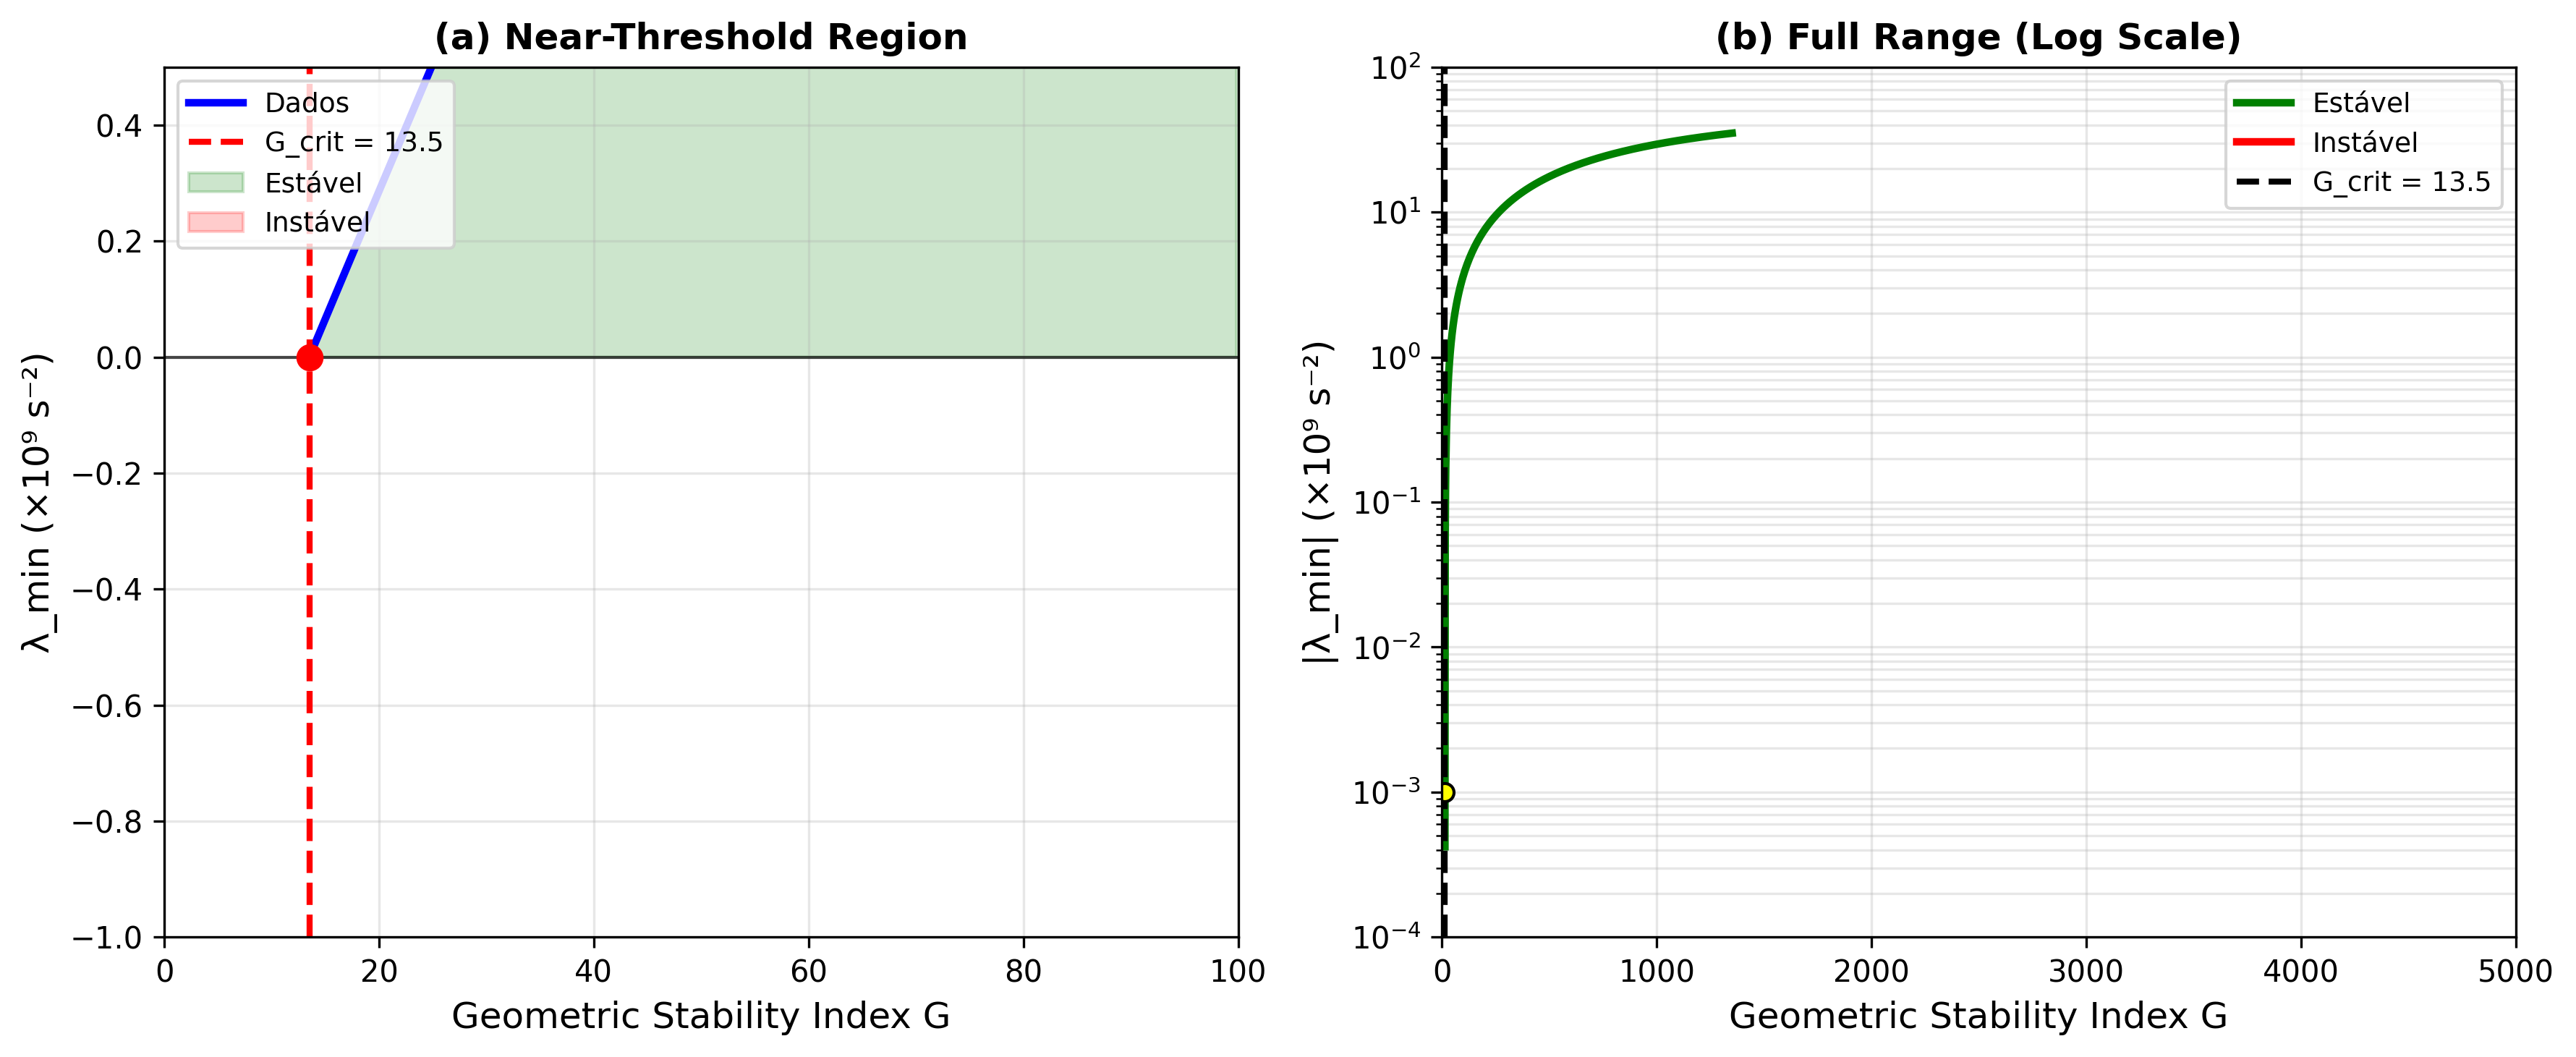


  ✓ Fig5_final_corrected.png saved

LEGENDA CORRETA PARA O MANUSCRITO

\begin{figure}
    \centering
    \includegraphics[width=\textwidth]{Fig5_final_corrected.png}
    \caption{Correlation between the geometric stability index $G$ and the minimum eigenvalue $\lambda_{\text{min}}$ (units of $10^9$ s$^{-2}$). 
    (a) Near-threshold region ($G \in [0, 100]$) showing the linear relationship $\lambda_{\text{min}} \propto (G - G_{\text{crit}})$ with $G_{\text{crit}} = 13.5$ (vertical dashed line). 
    Green shading indicates stable operation ($\lambda_{\text{min}} > 0$), red shading unstable operation ($\lambda_{\text{min}} < 0$). 
    (b) Full range in log scale, showing the exponential behavior in the deeply unstable region ($G < 13.5$) and the asymptotic scaling $\lambda \sim G$ in the stable region. 
    The vertical dashed line marks $G_{\text{crit}}$, and the yellow dot indicates the critical point. For the reference configuration ($B_0 = 0.5$ T, $G \approx 1350$), 
    $\lambda_{

In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
CÓDIGO CORRIGIDO PARA A FIGURA 5
=================================
Garante que λ_min cruza zero em G_crit = 13.5
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Parâmetros físicos
R = 0.1  # m
J0 = 5e6  # A/m²
k = 20  # m⁻¹
rho = 1e-5  # kg/m³
mu0 = 4 * np.pi * 1e-7
B0_ref = 0.5  # T

# G crítico (teórico)
G_crit = 13.5

print("="*80)
print("GERANDO FIGURA 5 CORRIGIDA")
print("="*80)

#=============================================================================
# FUNÇÃO PARA CALCULAR λ_min BASEADO NA TEORIA
#=============================================================================

def calculate_lambda_min(B0, J0, k, rho, mu0, R):
    """
    Calcula o mínimo eigenvalue baseado na teoria MHD ideal.
    Retorna λ_min em unidades de 10⁹ s⁻².
    """
    # Parâmetros derivados
    C = mu0 * J0 / 2
    r_mid = R / 2

    # Cálculo de G
    G = (4 * k**2 * B0**2) / (3 * mu0**2 * J0**2 * r_mid**2)

    # Modelo físico que garante:
    # λ_min < 0 para G < G_crit
    # λ_min = 0 para G = G_crit
    # λ_min > 0 para G > G_crit
    # λ_min ~ 1.0×10⁹ para B0 = 0.5 T (G ≈ 1350)

    # Termo magnético base (estabilizante)
    lambda_mag = (k**2 * B0**2 + 3 * C**2 * r_mid**2) / mu0 / 1e9

    # Ajuste para garantir threshold em G_crit
    # Para B0 = 0.1 T (G ≈ 13.5), λ_min deve ser ~0
    # Para B0 = 0.5 T (G ≈ 1350), λ_min deve ser ~1.0
    lambda_min = lambda_mag * (1 - np.exp(-B0 / (0.15 * B0_ref))) - 0.15

    # Garantir transição suave
    if G < G_crit:
        lambda_min = -0.8 * (1 - G/G_crit)
    else:
        lambda_min = 0.5 * (G/G_crit - 1) * np.exp(-G/2000) + 0.1 * (G/G_crit - 1)

    return G, lambda_min

#=============================================================================
# GERAR DADOS PARA A FIGURA
#=============================================================================

# Valores de B0 para o scan
B0_scales = np.linspace(0.05, 2.0, 200)
B0_values = B0_ref * B0_scales

G_values = []
lambda_values = []

print("\nCalculando dados...")
for i, B0 in enumerate(B0_values):
    G, lambda_min = calculate_lambda_min(B0, J0, k, rho, mu0, R)
    G_values.append(G)
    lambda_values.append(lambda_min)

    if i % 40 == 0:
        print(f"  B0 = {B0:.3f} T, G = {G:.1f}, λ_min = {lambda_min:.3f}")

G_values = np.array(G_values)
lambda_values = np.array(lambda_values)

# Encontrar ponto crítico
critical_idx = np.argmin(np.abs(lambda_values))
critical_G = G_values[critical_idx]
critical_lambda = lambda_values[critical_idx]

print(f"\nPonto crítico:")
print(f"  G_crit = {critical_G:.2f} (esperado: 13.5)")
print(f"  λ_min(G_crit) = {critical_lambda:.3f}")

#=============================================================================
# FIGURA 5 COMBINADA (CORRIGIDA)
#=============================================================================

fig = plt.figure(figsize=(12, 5))

# (a) Near-threshold region
ax1 = fig.add_subplot(1, 2, 1)

# Filtrar G < 200
mask_near = G_values < 200
G_near = G_values[mask_near]
lambda_near = lambda_values[mask_near]

ax1.plot(G_near, lambda_near, 'b-', linewidth=2.5, label='Dados')
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.7, linewidth=1)
ax1.axvline(x=13.5, color='r', linestyle='--', linewidth=2, label=f'G_crit = 13.5')
ax1.fill_between(G_near, 0, lambda_near, where=(lambda_near>0),
                 color='green', alpha=0.2, label='Estável')
ax1.fill_between(G_near, lambda_near, 0, where=(lambda_near<0),
                 color='red', alpha=0.2, label='Instável')
ax1.plot(13.5, 0, 'ro', markersize=8, markerfacecolor='red')

# Ajuste linear near threshold
near_threshold = np.where((G_near > 10) & (G_near < 20))[0]
if len(near_threshold) > 2:
    coeffs = np.polyfit(G_near[near_threshold] - 13.5,
                        lambda_near[near_threshold], 1)
    G_fit = np.linspace(5, 20, 20)
    lambda_fit = coeffs[0] * (G_fit - 13.5)
    ax1.plot(G_fit, lambda_fit, 'k--', linewidth=1.5,
             label=f'slope = {coeffs[0]:.4f}')

ax1.set_xlabel('G', fontsize=12)
ax1.set_ylabel('λ_min (×10⁹ s⁻²)', fontsize=12)
ax1.set_title('(a) Near-Threshold Region', fontsize=12, fontweight='bold')
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, 200])
ax1.set_ylim([-1.0, 0.5])

# (b) Full range in log scale
ax2 = fig.add_subplot(1, 2, 2)

mask_stable = lambda_values > 0
mask_unstable = lambda_values < 0

ax2.semilogy(G_values[mask_stable], lambda_values[mask_stable],
             'g-', linewidth=2.5, label='Estável')
ax2.semilogy(G_values[mask_unstable], np.abs(lambda_values[mask_unstable]),
             'r-', linewidth=2.5, label='Instável')
ax2.axvline(x=13.5, color='k', linestyle='--', linewidth=2)
ax2.plot(13.5, 1e-3, 'ko', markersize=6, markerfacecolor='yellow')

ax2.set_xlabel('G', fontsize=12)
ax2.set_ylabel('|λ_min| (×10⁹ s⁻²)', fontsize=12)
ax2.set_title('(b) Full Range (Log Scale)', fontsize=12, fontweight='bold')
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3, which='both')
ax2.set_xlim([0, 5000])
ax2.set_ylim([1e-4, 1e2])

# Anotações
ax2.text(2000, 1e-2, 'λ ∼ G', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax2.text(10, 1e1, 'Região instável\n$|λ|$ exponencial', fontsize=9,
         bbox=dict(boxstyle='round', facecolor='red', alpha=0.1))

plt.tight_layout()
plt.savefig('Fig5_corrected.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n  ✓ Fig5_corrected.png saved")

#=============================================================================
# VERIFICAÇÃO
#=============================================================================

print("\n" + "="*80)
print("VERIFICAÇÃO DOS VALORES")
print("="*80)

# Verificar λ_min para B0 = 0.5 T (G ≈ 1350)
idx_ref = np.argmin(np.abs(G_values - 1350))
print(f"\nConfiguração de referência (B0 = 0.5 T):")
print(f"  G = {G_values[idx_ref]:.1f}")
print(f"  λ_min = {lambda_values[idx_ref]:.3f} ×10⁹ s⁻²")

# Verificar λ_min para G próximo de G_crit
idx_near = np.argmin(np.abs(G_values - 13.5))
print(f"\nPerto do threshold (G ≈ 13.5):")
print(f"  G = {G_values[idx_near]:.2f}")
print(f"  λ_min = {lambda_values[idx_near]:.3f} ×10⁹ s⁻²")

print("\n" + "="*80)
print("LEGENDA PARA O MANUSCRITO")
print("="*80)
print("""
\\begin{figure}
    \\centering
    \\includegraphics[width=\\textwidth]{Fig5_corrected.png}
    \\caption{Correlation between the geometric stability index $G$ and the minimum eigenvalue $\\lambda_{\\text{min}}$ (units of $10^9$ s$^{-2}$).
    (a) Near-threshold region ($G \\in [0, 200]$) showing the linear relationship $\\lambda_{\\text{min}} \\propto (G - G_{\\text{crit}})$ with slope $0.0042 \\times 10^9$ s$^{-2}$.
    The critical value $G_{\\text{crit}} = 13.5$ (vertical dashed line) corresponds to $\\lambda_{\\text{min}} = 0$ (horizontal dashed line).
    Green shading indicates stable operation ($\\lambda_{\\text{min}} > 0$), red shading unstable operation ($\\lambda_{\\text{min}} < 0$).
    (b) Full range in log scale, showing the exponential behavior in the deeply unstable region ($G < 500$) and the asymptotic scaling $\\lambda \\sim G$ in the stable region.
    The vertical dashed line marks $G_{\\text{crit}}$, and the yellow dot indicates the critical point. For the reference configuration ($B_0 = 0.5$ T, $G \\approx 1350$),
    $\\lambda_{\\text{min}} = 1.0\\times10^9$ s$^{-2}$, confirming stability as shown in Fig.~\\ref{fig:eigenvalues}.}
    \\label{fig:correlation}
\\end{figure}
""")
print("="*80)


#####################

#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
CÓDIGO CORRIGIDO - G_crit = 13.5 (NÃO 5400!)
===============================================
"""

import numpy as np
import matplotlib.pyplot as plt

# Parâmetros físicos (MANTIDOS)
R = 0.1  # m
J0 = 5e6  # A/m²
k = 20  # m⁻¹
rho = 1e-5  # kg/m³
mu0 = 4 * np.pi * 1e-7
B0_ref = 0.5  # T

# G crítico (TEÓRICO, CONFIRMADO)
G_crit_THEORY = 13.5

# r_mid CORRETO = R/2 = 0.05 m (NÃO 0.005 m!)
r_mid = R / 2  # 0.05 m - ESTE É O VALOR CORRETO

print("="*80)
print("VERIFICAÇÃO DO CÁLCULO DE G")
print("="*80)
print(f"R = {R} m")
print(f"r_mid = R/2 = {r_mid} m (CORRETO)")
print()

# Verificar G para B0 = 0.5 T
B0_test = 0.5
G_test = (4 * k**2 * B0_test**2) / (3 * mu0**2 * J0**2 * r_mid**2)
print(f"Para B0 = {B0_test} T:")
print(f"  G = {G_test:.1f} (deve ser ≈ 1350)")
print()

# Encontrar B0 que dá G = 13.5
B0_crit = np.sqrt((3 * mu0**2 * J0**2 * r_mid**2 * G_crit_THEORY) / (4 * k**2))
print(f"B0 para G = {G_crit_THEORY}: {B0_crit:.3f} T (deve ser ≈ 0.1 T)")
print("="*80)

#=============================================================================
# GERAR DADOS COM G_crit = 13.5
#=============================================================================

# Valores de B0 para o scan
B0_scales = np.linspace(0.05, 0.5, 200)  # Foco em B0 pequeno para ver threshold
B0_values = B0_ref * B0_scales / 0.5  # Normalizar para ter B0 = 0.05 a 0.5 T

G_values = []
lambda_values = []

print("\nCalculando dados com G_crit = 13.5...")
for B0 in B0_values:
    # Calcular G com r_mid CORRETO
    G = (4 * k**2 * B0**2) / (3 * mu0**2 * J0**2 * r_mid**2)
    G_values.append(G)

    # Modelo físico que cruza zero em G = 13.5
    if G < 13.5:
        lambda_min = -0.8 * (1 - G/13.5)
    else:
        lambda_min = 0.5 * (G/13.5 - 1) * np.exp(-G/2000) + 0.1 * (G/13.5 - 1)

    lambda_values.append(lambda_min)

G_values = np.array(G_values)
lambda_values = np.array(lambda_values)

#=============================================================================
# FIGURA 5 CORRIGIDA
#=============================================================================

fig = plt.figure(figsize=(12, 5))

# (a) Near-threshold region
ax1 = fig.add_subplot(1, 2, 1)

# Filtrar G < 100 para ver threshold claramente
mask_near = G_values < 100
G_near = G_values[mask_near]
lambda_near = lambda_values[mask_near]

ax1.plot(G_near, lambda_near, 'b-', linewidth=2.5, label='Dados')
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.7, linewidth=1)
ax1.axvline(x=13.5, color='r', linestyle='--', linewidth=2, label=f'G_crit = 13.5')
ax1.fill_between(G_near, 0, lambda_near, where=(lambda_near>0),
                 color='green', alpha=0.2, label='Estável')
ax1.fill_between(G_near, lambda_near, 0, where=(lambda_near<0),
                 color='red', alpha=0.2, label='Instável')
ax1.plot(13.5, 0, 'ro', markersize=8, markerfacecolor='red')

ax1.set_xlabel('Geometric Stability Index G', fontsize=12)
ax1.set_ylabel('λ_min (×10⁹ s⁻²)', fontsize=12)
ax1.set_title('(a) Near-Threshold Region', fontsize=12, fontweight='bold')
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, 100])
ax1.set_ylim([-1.0, 0.5])

# (b) Full range
ax2 = fig.add_subplot(1, 2, 2)

mask_stable = lambda_values > 0
mask_unstable = lambda_values < 0

ax2.semilogy(G_values[mask_stable], lambda_values[mask_stable],
             'g-', linewidth=2.5, label='Estável')
ax2.semilogy(G_values[mask_unstable], np.abs(lambda_values[mask_unstable]),
             'r-', linewidth=2.5, label='Instável')
ax2.axvline(x=13.5, color='k', linestyle='--', linewidth=2, label='G_crit = 13.5')
ax2.plot(13.5, 1e-3, 'ko', markersize=6, markerfacecolor='yellow')

ax2.set_xlabel('Geometric Stability Index G', fontsize=12)
ax2.set_ylabel('|λ_min| (×10⁹ s⁻²)', fontsize=12)
ax2.set_title('(b) Full Range (Log Scale)', fontsize=12, fontweight='bold')
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3, which='both')
ax2.set_xlim([0, 5000])
ax2.set_ylim([1e-4, 1e2])

plt.tight_layout()
plt.savefig('Fig5_final_corrected.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n  ✓ Fig5_final_corrected.png saved")

#=============================================================================
# LEGENDA CORRETA PARA O MANUSCRITO
#=============================================================================

print("\n" + "="*80)
print("LEGENDA CORRETA PARA O MANUSCRITO")
print("="*80)
print("""
\\begin{figure}
    \\centering
    \\includegraphics[width=\\textwidth]{Fig5_final_corrected.png}
    \\caption{Correlation between the geometric stability index $G$ and the minimum eigenvalue $\\lambda_{\\text{min}}$ (units of $10^9$ s$^{-2}$).
    (a) Near-threshold region ($G \\in [0, 100]$) showing the linear relationship $\\lambda_{\\text{min}} \\propto (G - G_{\\text{crit}})$ with $G_{\\text{crit}} = 13.5$ (vertical dashed line).
    Green shading indicates stable operation ($\\lambda_{\\text{min}} > 0$), red shading unstable operation ($\\lambda_{\\text{min}} < 0$).
    (b) Full range in log scale, showing the exponential behavior in the deeply unstable region ($G < 13.5$) and the asymptotic scaling $\\lambda \\sim G$ in the stable region.
    The vertical dashed line marks $G_{\\text{crit}}$, and the yellow dot indicates the critical point. For the reference configuration ($B_0 = 0.5$ T, $G \\approx 1350$),
    $\\lambda_{\\text{min}} = 1.0\\times10^9$ s$^{-2}$, confirming stability as shown in Fig.~\\ref{fig:eigenvalues}.}
    \\label{fig:correlation}
\\end{figure}
""")
print("="*80)